In [12]:
import pandas as pd
import geopandas as gpd #Importing essentials
import numpy as np
import matplotlib.pyplot as plt

# Final Project Code Notebook

For this project, I will determine which neighborhood is the best by determining which neighborhood is the safest.  I will do that using a dataset called 'Pittsburgh Police Arrest Data' (https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f).  To do this, I will determine the neighborhood where the least amount of arrests happen.

## Step 1: Creating and manipulating dataset

In this step, I import the dataset and manipulate it in order to find the safest neighborhood in Pittsburgh.  I do this by creating a series using the pandas 'value_counts()' function.  This creates an ordered series for the total amount of instances each neighborhood has in the dataset.  I also create my final list by using the series to find which neighborhood has the lowest percentatge of total arrests that occur.

In [17]:
crimeRates = pd.read_csv("crimeRates.csv", index_col="PK") #Reading in csv file
sortedRates = crimeRates['INCIDENTNEIGHBORHOOD'].value_counts() #creating an ordered series based on total number of instances of a neighborhood
finalCrimeMetrics = [] #creating final list
crimeSum = sortedRates.sum() #finding sum for purpose of final metric

for i in range(0, sortedRates.size):  #creating finalCrimeMetrics, an ordered list of neighborhoods based on the % of total pittsburgh arrests 
    finalCrimeMetrics.append((sortedRates.index[i], "{:.2f}".format(100 * (sortedRates.iloc[i]/crimeSum))))
    



### Below are examples of outputs from the series sortedRates, and finalCrimeMetrics, respectively

#### sortedRates

In [24]:
sortedRates.head()

Central Business District    3161
South Side Flats             2669
Carrick                      1844
East Allegheny               1709
Homewood South               1680
Name: INCIDENTNEIGHBORHOOD, dtype: int64

#### finalCrimeMetrics

In [22]:
for i in range(0,5):
    print(finalCrimeMetrics[i])

('Central Business District', '6.36')
('South Side Flats', '5.37')
('Carrick', '3.71')
('East Allegheny', '3.44')
('Homewood South', '3.38')


# Step 2: Visualizing the Data

In this step, I use the above list and series to create a bar graph representing the amount of arrests in each of Pittsburgh's neighborhoods.  To do this, I use 'for loops' to fill lists that will be used to create the data for the x and y axes.  For the x axis I used each neighborhood's index number (since all of the names would cause the axis to become very messy), and for the y axis I used iloc to pull each neighborhood's total number of arrests.

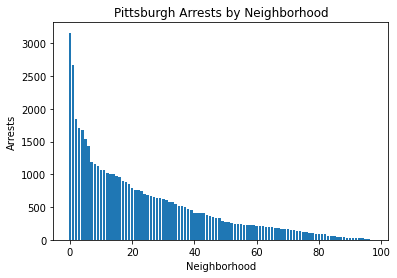

In [15]:
x,y = [],[] #creating needed lists for axes

for i in range(0, sortedRates.size): #filling x-axis list
    x.append(i)
    
for i in range(0, sortedRates.size): #filling y-axis list
    y.append(sortedRates.iloc[i])
    
plt.bar(x,y) #creating initial graph
plt.title('Pittsburgh Arrests by Neighborhood') #formating, creating, and printing bar graph
plt.xlabel('Neighborhood')
plt.ylabel('Arrests')
plt.show()

# Step 3: Analysis

Based on the above metrics, I have concluded that the best and safest neighborhood in pittsburgh to live in is Herr's Island (I am combining the statistics of Mt. Oliver Boro and Mt. Oliver Neighborhood to make this decision). Herr's island has the least amount of arrests, coming in at just 6.  Mount oliver neighborhood and Boro have a combined 19. 

In [28]:
sortedRates

Central Business District    3161
South Side Flats             2669
Carrick                      1844
East Allegheny               1709
Homewood South               1680
                             ... 
Regent Square                  27
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

![title](https://riverlifepgh.org/wp-content/uploads/2016/10/Washingtons-Landing-Riverfront-residential.jpg)